# Learning outcome 4

1.       Load dataset X ... 

2.       Describe dataset (i.e. provide shape, data types and basic descriptive statistics) and scale the data (sklearn.preprocessing.scale). Describe why you scaled your data. 

3.       Perform Principal Component Analysis on the dataset. How many principal components do you need so that the explained variance score in total would be greater than 80%? 

# Learning outcome 5 

4.       From https://finance.yahoo.com download historical data for quote ? from Jan 01, 2013 – May 9, 2018. Load dataset and using column ‘Date’ set index to Pandas DataFrame that contains your data. (Remember first to convert ‘Date’ to DatetimeIndex. Is there an easier way to set time index?) 

5. Take column Adj Close and resample it with weekly frequency from Monday using the mean value of the stock price. 

# Learning outcome 6 

6.      Using the same data from LO5 calculate the simple daily percentage change in adjusted closing price (Adj Close), add another column to your data frame that will contain the descriptive variable “UP” or “DOWN” that will reflect positive and negative returns respectfully.  

7.     Using only Adj Close column resample all values to the end of the month and forward fill any missing values. Calculate the simple monthly percentage changes and compare that number to the proportion of “UP” movements you found in the previous question.  

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LO 4

In [2]:
data=pd.read_csv('inclusions.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
data.shape

(214, 10)

# Visualisation

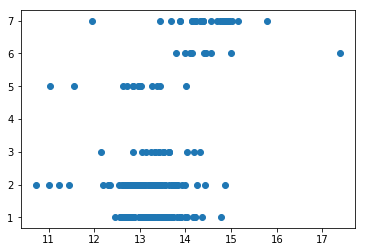

In [23]:
plt.scatter(data.Na,data.Type)

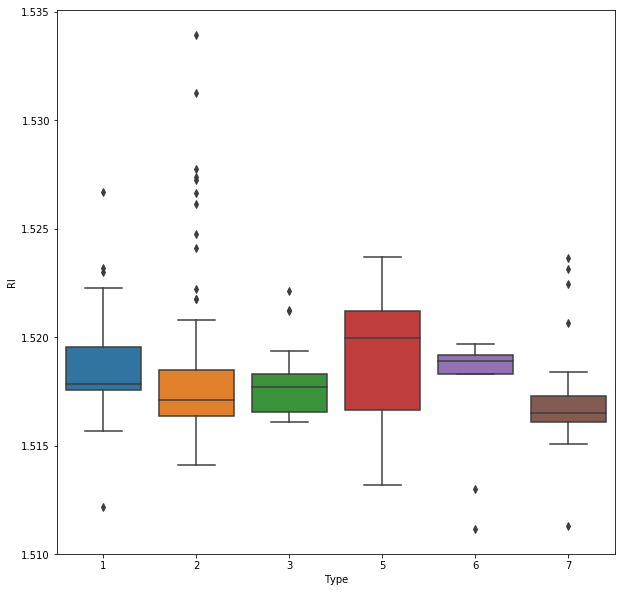

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data.Type, y=data.RI)

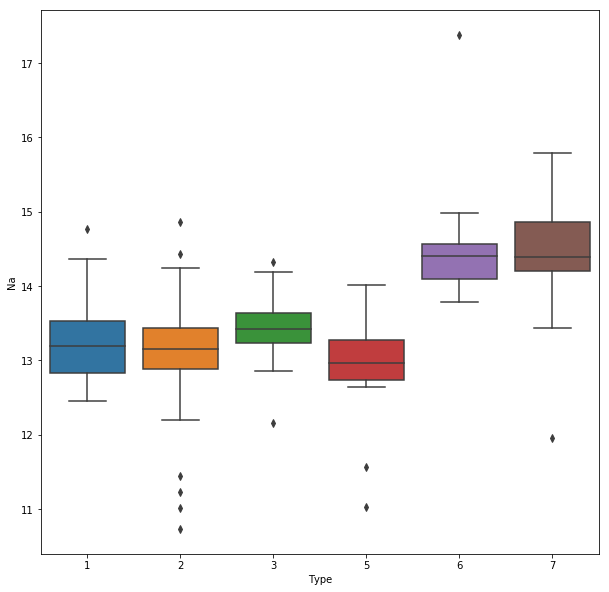

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data.Type, y=data.Na)

In [13]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [14]:
data.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

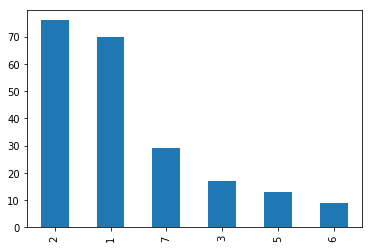

In [15]:
data.Type.value_counts().plot.bar()

We can use label encoder to transform categorical data to numerical.

In [16]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [25]:
X=data.drop(columns='Type')
y=data.Type

In [26]:
from sklearn.preprocessing import StandardScaler

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [27]:
X_std=StandardScaler().fit_transform(X)

In [32]:
X_std=pd.DataFrame(X_std)

In [33]:
X_std.columns=X.columns

In [39]:
X_std.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


(array([  6.,   9., 109.,  47.,  28.,   7.,   3.,   3.,   1.,   1.]),
 array([1.51115 , 1.513428, 1.515706, 1.517984, 1.520262, 1.52254 ,
        1.524818, 1.527096, 1.529374, 1.531652, 1.53393 ]),
 <a list of 10 Patch objects>)

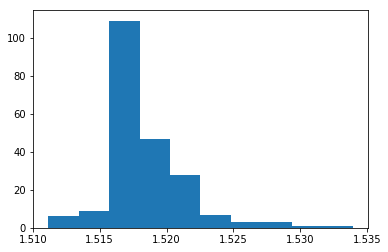

In [40]:
plt.hist(X.RI)

(array([  6.,   9., 109.,  47.,  28.,   7.,   3.,   3.,   1.,   1.]),
 array([-2.38151559, -1.62964084, -0.87776609, -0.12589135,  0.6259834 ,
         1.37785815,  2.12973289,  2.88160764,  3.63348239,  4.38535714,
         5.13723188]),
 <a list of 10 Patch objects>)

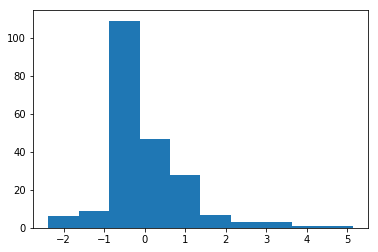

In [41]:
plt.hist(X_std.RI)

In [42]:
# we can recognize outliers!!

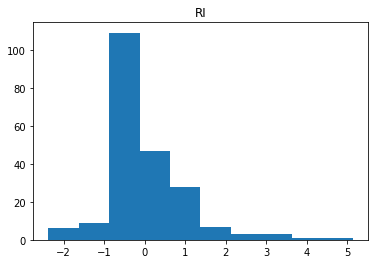

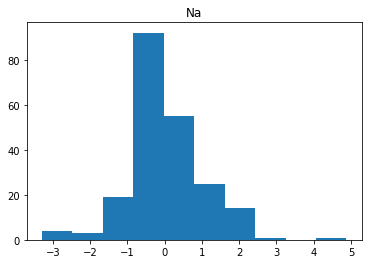

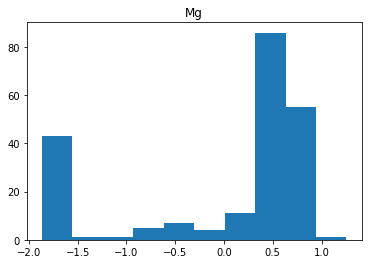

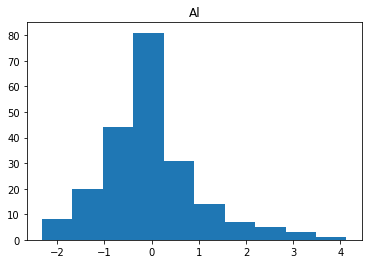

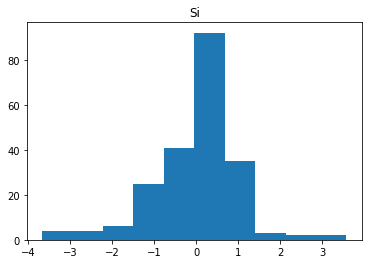

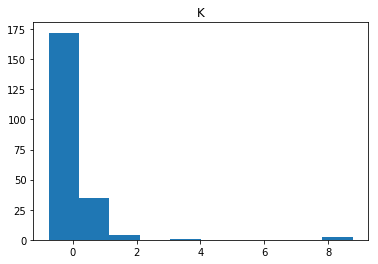

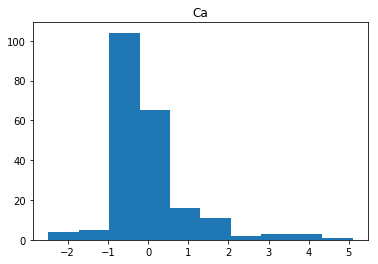

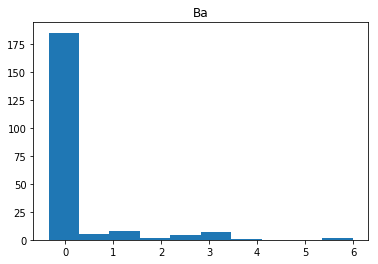

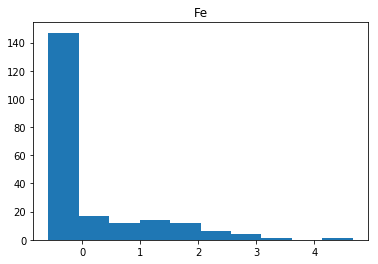

In [45]:
for col in X_std.columns:
    hist=plt.hist(X_std[col])
    plt.title(col)
    plt.show()

In [46]:
# we can now easily detect outliers!

In [47]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Cumulative explained variance')

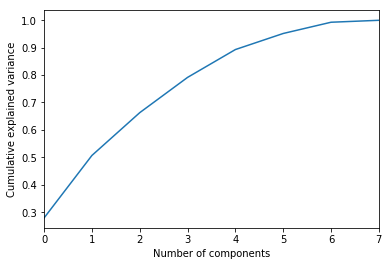

In [53]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

* How many principal components do you need so that the explained variance score in total would be greater than 80%? 

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27901819, 0.50680399, 0.66289777, 0.79154915, 0.89310496,
       0.95173109, 0.99272647, 0.99982124, 1.        ])

I need 4 prinicipal components to have variance score bigger than 80%.

In [55]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [56]:
print(Y_sklearn)

[[ 1.15113957e+00 -5.29487638e-01 -3.72095655e-01  1.72890103e+00]
 [-5.74137172e-01 -7.59787774e-01 -5.56708167e-01  7.60232283e-01]
 [-9.40159722e-01 -9.29835966e-01 -5.54907439e-01  2.06254310e-01]
 [-1.42083283e-01 -9.61677440e-01 -1.17124685e-01  4.15724023e-01]
 [-3.51092291e-01 -1.09124921e+00 -4.85078693e-01  6.91022960e-02]
 [-2.90266583e-01 -1.32400756e+00  8.68678618e-01 -9.27797404e-01]
 [-2.52671444e-01 -1.11614958e+00 -5.40637854e-01  8.03281095e-02]
 [-1.20299466e-01 -1.22184622e+00 -6.24742242e-01 -1.16022079e-01]
 [-2.08160308e-02 -3.21932609e-01 -1.09059681e-01  1.37167219e+00]
 [-2.35222894e-03 -1.06581344e+00  1.20855026e-01 -3.76021036e-01]
 [-3.82514937e-01 -1.38013403e+00  6.89524312e-01 -1.15756065e+00]
 [-1.33538675e-02 -1.10471913e+00 -1.44800991e-01 -2.41088531e-01]
 [-3.09724390e-01 -1.42304024e+00  4.86063702e-01 -1.07700794e+00]
 [ 1.56521013e-01 -1.23592823e+00  1.39706729e-01 -7.71898725e-01]
 [-8.99566628e-02 -1.18125211e+00 -2.15538949e-01 -6.08702541e

# LO 5
4. From https://finance.yahoo.com download historical data for quote ? from Jan 01, 2013 – May 9, 2018. Load dataset and using column ‘Date’ set index to Pandas DataFrame that contains your data. (Remember first to convert ‘Date’ to DatetimeIndex. Is there an easier way to set time index?) [5 points]

5. Take column Adj Close and resample it with weekly frequency from Monday using the mean value of the stock price. [5 points]

In [57]:
import pandas_datareader as pdr
from datetime import datetime, date

In [58]:
def get_stock_data (ticker, start, end):
    return pdr.get_data_yahoo(ticker,start,end)

In [59]:
start_date=datetime(year=2013, month=1, day=1)
end_date=datetime(year=2018, month=5, day=9)

In [62]:
stock=get_stock_data('NFLX', start_date, end_date)

In [63]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,13.687143,12.955714,13.601429,13.144286,19431300.0,13.144286
2013-01-03,13.988571,13.075714,13.138572,13.798572,27912500.0,13.798572
2013-01-04,13.958571,13.648571,13.791429,13.711429,17761100.0,13.711429
2013-01-07,14.535714,13.731428,13.770000,14.171429,45550400.0,14.171429
2013-01-08,14.427143,13.828571,14.287143,13.880000,24714900.0,13.880000


In [64]:
stock.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [65]:
stock_adjClose=apple['Adj Close']

In [66]:
stock_adjClose=pd.DataFrame(apple['Adj Close'])

In [67]:
stock_adjClose.head(2)

,Adj Close
Date,
2013-01-02,13.144286
2013-01-03,13.798572


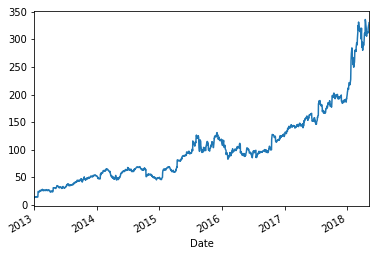

In [68]:
# first plot it
stock_adjClose['Adj Close'].plot()

In [69]:
data_weekly=stock['Adj Close'].resample('W-MON').mean()

In [70]:
data_weekly=pd.DataFrame(data_weekly)

In [72]:
data_weekly.head()

,Adj Close
Date,
2013-01-07,13.706429
2013-01-14,14.166000
2013-01-21,14.144286
2013-01-28,19.417143
2013-02-04,24.045714


Text(0.5, 1.0, 'Apple price weekly on Monday')

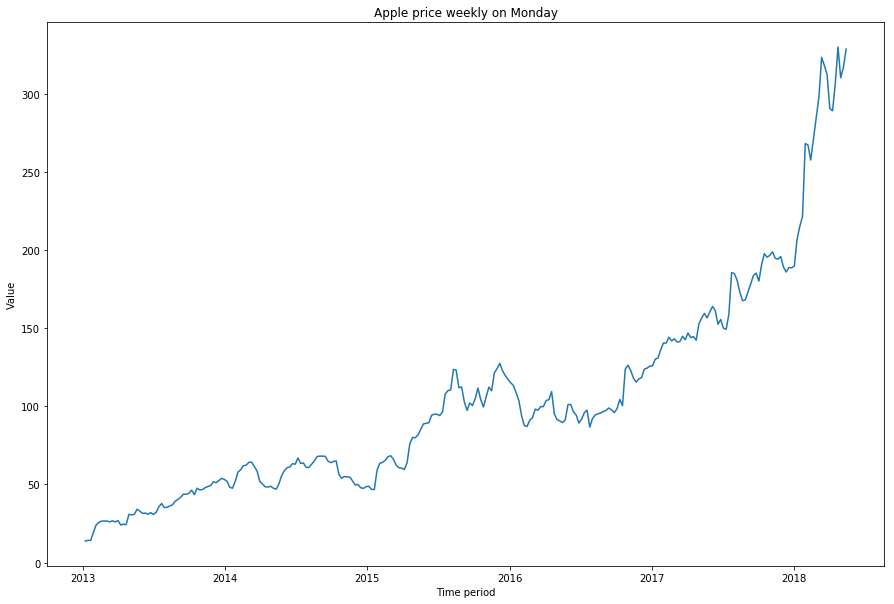

In [73]:
plt.figure(figsize=(15,10))
plt.plot(data_weekly['Adj Close'])
plt.xlabel('Time period')
plt.ylabel('Value')
plt.title('Apple price weekly on Monday')

# Learning outcome 6 – 10 points
6. Using the same data from LO5 calculate the simple daily percentage change in adjusted closing price (Adj Close), add another column to your data frame that will contain the descriptive variable “UP” or “DOWN” that will reflect positive and negative returns respectfully. [5 points]

7. Using only Adj Close column resample all values to the end of the month and forward fill any missing values. Calculate the simple monthly percentage changes and compare that number to the proportion of “UP” movements you found in the previous question. [5 points]

In [74]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,13.687143,12.955714,13.601429,13.144286,19431300.0,13.144286
2013-01-03,13.988571,13.075714,13.138572,13.798572,27912500.0,13.798572
2013-01-04,13.958571,13.648571,13.791429,13.711429,17761100.0,13.711429
2013-01-07,14.535714,13.731428,13.770000,14.171429,45550400.0,14.171429
2013-01-08,14.427143,13.828571,14.287143,13.880000,24714900.0,13.880000


In [75]:
stock['Daily changes']=stock['Adj Close']/stock['Adj Close'].shift(1)-1

In [76]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close,Daily changes
Date,,,,,,,
2013-01-02,13.687143,12.955714,13.601429,13.144286,19431300.0,13.144286,NaN
2013-01-03,13.988571,13.075714,13.138572,13.798572,27912500.0,13.798572,0.049777
2013-01-04,13.958571,13.648571,13.791429,13.711429,17761100.0,13.711429,-0.006315
2013-01-07,14.535714,13.731428,13.770000,14.171429,45550400.0,14.171429,0.033549
2013-01-08,14.427143,13.828571,14.287143,13.880000,24714900.0,13.880000,-0.020565


In [77]:
import math

In [78]:
stock['Daily changes']=stock['Daily changes'].fillna(0)
def func(stock):
    if stock['Daily changes'] == 0:
        return 'SAME'
    elif stock['Daily changes'] > 0:
        return 'UP'
    else:
        return 'DOWN'

In [79]:
stock['Daily RETURNS']=stock.apply(func, axis=1)

In [80]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close,Daily changes,Daily RETURNS
Date,,,,,,,,
2013-01-02,13.687143,12.955714,13.601429,13.144286,19431300.0,13.144286,0.000000,SAME
2013-01-03,13.988571,13.075714,13.138572,13.798572,27912500.0,13.798572,0.049777,UP
2013-01-04,13.958571,13.648571,13.791429,13.711429,17761100.0,13.711429,-0.006315,DOWN
2013-01-07,14.535714,13.731428,13.770000,14.171429,45550400.0,14.171429,0.033549,UP
2013-01-08,14.427143,13.828571,14.287143,13.880000,24714900.0,13.880000,-0.020565,DOWN


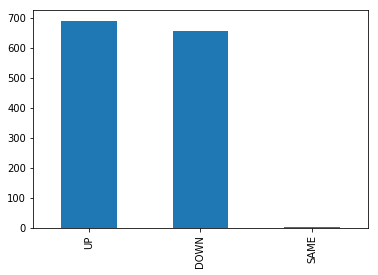

In [81]:
stock['Daily RETURNS'].value_counts().plot.bar()

In [82]:
stock_monthly=stock['Adj Close'].asfreq('M').ffill()

In [83]:
stock_monthly=pd.DataFrame(stock_monthly)

In [84]:
stock_monthly.head()

,Adj Close
Date,
2013-01-31,23.605715
2013-02-28,26.868572
2013-03-31,26.868572
2013-04-30,30.867144
2013-05-31,32.321430


Calculate the simple monthly percentage changes and compare that number to the proportion of “UP” movements you found in the previous question. 

In [85]:
stock_monthly['Monthly changes']=stock_monthly/stock_monthly.shift(1)-1

In [86]:
stock_monthly.head()

,Adj Close,Monthly changes
Date,,
2013-01-31,23.605715,NaN
2013-02-28,26.868572,0.138223
2013-03-31,26.868572,0.000000
2013-04-30,30.867144,0.148820
2013-05-31,32.321430,0.047114


In [87]:
stock_monthly['Monthly changes']=stock_monthly['Monthly changes'].fillna(0)

In [88]:
def func(stock_monthly):
    if stock_monthly['Monthly changes'] == 0:
        return 'SAME'
    elif stock_monthly['Monthly changes'] > 0:
        return 'UP'
    else:
        return 'DOWN'

In [89]:
stock_monthly.head()

,Adj Close,Monthly changes
Date,,
2013-01-31,23.605715,0.000000
2013-02-28,26.868572,0.138223
2013-03-31,26.868572,0.000000
2013-04-30,30.867144,0.148820
2013-05-31,32.321430,0.047114


In [90]:
stock_monthly['Monthly RETURN']=stock_monthly.apply(func, axis=1)

In [91]:
stock_monthly.head()

,Adj Close,Monthly changes,Monthly RETURN
Date,,,
2013-01-31,23.605715,0.000000,SAME
2013-02-28,26.868572,0.138223,UP
2013-03-31,26.868572,0.000000,SAME
2013-04-30,30.867144,0.148820,UP
2013-05-31,32.321430,0.047114,UP


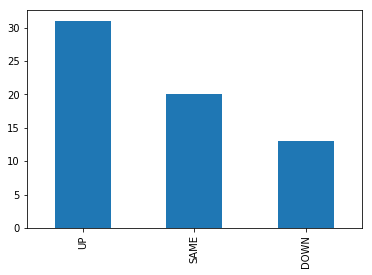

In [92]:
stock_monthly['Monthly RETURN'].value_counts().plot.bar()

In [93]:
stock['Daily RETURNS'].value_counts()

UP      690
DOWN    655
SAME      3
Name: Daily RETURNS, dtype: int64

In [94]:
stock_monthly['Monthly RETURN'].value_counts()

UP      31
SAME    20
DOWN    13
Name: Monthly RETURN, dtype: int64

In [95]:
print('Percentage UP on daily : ', 690/(690+655+3)*100,'%')
print('Percentage UP on monthly : ', 31/(31+20+13)*100,'%')

Percentage UP on daily :  51.18694362017804 %
Percentage UP on monthly :  48.4375 %
